###  FEATURE ENGINEERING STEPS 
- Exploring Features of the dataset
- Hypothesis Testing 
- Checking for Normal Distribution using Transformations

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy import stats
import scipy.stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("F:\\0.0.7. The Data Psychology\\01. Python\\EDA\\student_performance\\student_performance\\data\\student.csv")

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [6]:
df.shape

(1000, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 2 .Hypothesis Testing
#### 2.1 Checking correlation

In [8]:
df.corr()

ValueError: could not convert string to float: 'female'

In [10]:
df_num = df.iloc[:, 5:]

In [11]:
df_num.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


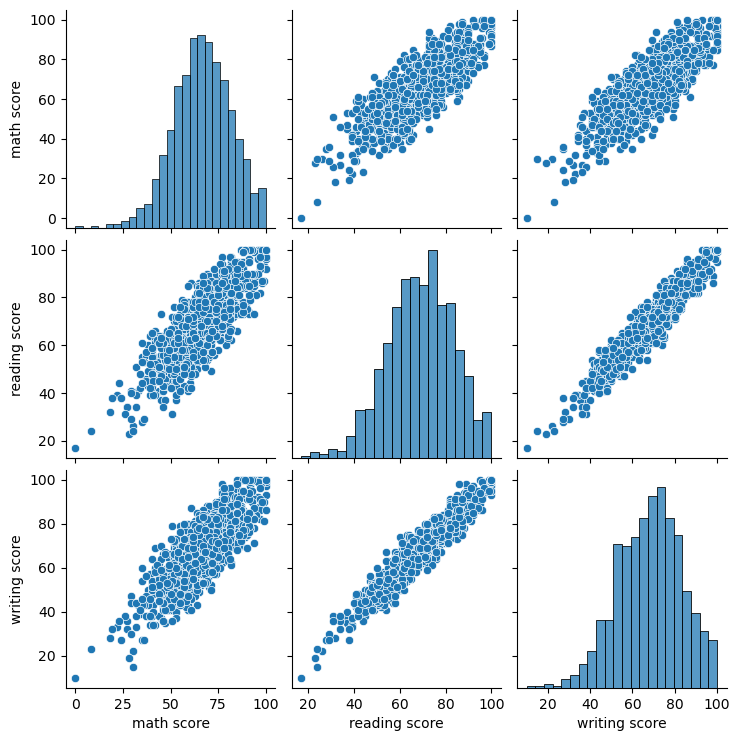

In [12]:
sns.pairplot(df.iloc[:, 4:8])

#### Insights
- All of the pairplots seems to have a linear relationship with the other variable. To clarify that we'll plot the correlation map.

In [13]:
num_features=[col for col in df.columns if df[col].dtype!='O']
num_df = df[num_features]

In [14]:
num_df

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


#### 2.2  Shapiro Wick Test
* **The Shapiro-Wilk test is a way to tell if a random sample comes from a normal distribution.**

- Ho : Data is normally distributed
- H1 : Data is not normally distributed

In [15]:
from scipy.stats import shapiro

In [16]:
shapiro_wick_test = []
for column in num_features:
    dataToTest = num_df[column]
    stat,p = shapiro(dataToTest)
    if p > 0.05:
        shapiro_wick_test.append("Normally Distributed")
    else:
        shapiro_wick_test.append("Not Normally Distributed")

In [17]:
result = pd.DataFrame(data=[num_features, shapiro_wick_test]).T
result.columns = ['Column Name', 'Shapiro Hypothesis Result']
result

,Column Name,Shapiro Hypothesis Result
0,math score,Not Normally Distributed
1,reading score,Not Normally Distributed
2,writing score,Not Normally Distributed


#### 2.3 K^2 Normality Test
* **Test aims to establish whether or not the given sample comes from a normally distributed population. Test is based on transformations of the sample kurtosis and skewness**

- Ho : Data is normally distributed
- H1 : Data is not normally distributed

In [18]:
from scipy.stats import normaltest

In [19]:
normaltest_test = []
for column in num_features:
    dataToTest = num_df[column]
    stat,p = normaltest(dataToTest)
    if p > 0.05:
        normaltest_test.append("Normally Distributed")
    else:
        normaltest_test.append("Not Normally Distributed")

In [20]:
result = pd.DataFrame(data=[num_features, normaltest_test]).T
result.columns = ['Column Name', 'normaltest Hypothesis Result']
result

,Column Name,normaltest Hypothesis Result
0,math score,Not Normally Distributed
1,reading score,Not Normally Distributed
2,writing score,Not Normally Distributed


#### 2.4 Spearman rank Test

* **Spearman Rank Correlation, which is used to measure the correlation between two ranked variables**
* **Whereas The Pearson correlation coefficient is computed using raw data values**
* **Unlike the Pearson correlation, the Spearman correlation does not assume that both datasets are normally distributed.**
* **Spearman rank correlation is closely related to the Pearson correlation, and both are a bounded value, from -1 to 1 denoting a correlation between two variables.**
- Ho : Independent Samples
- H1 : Dependent Samples

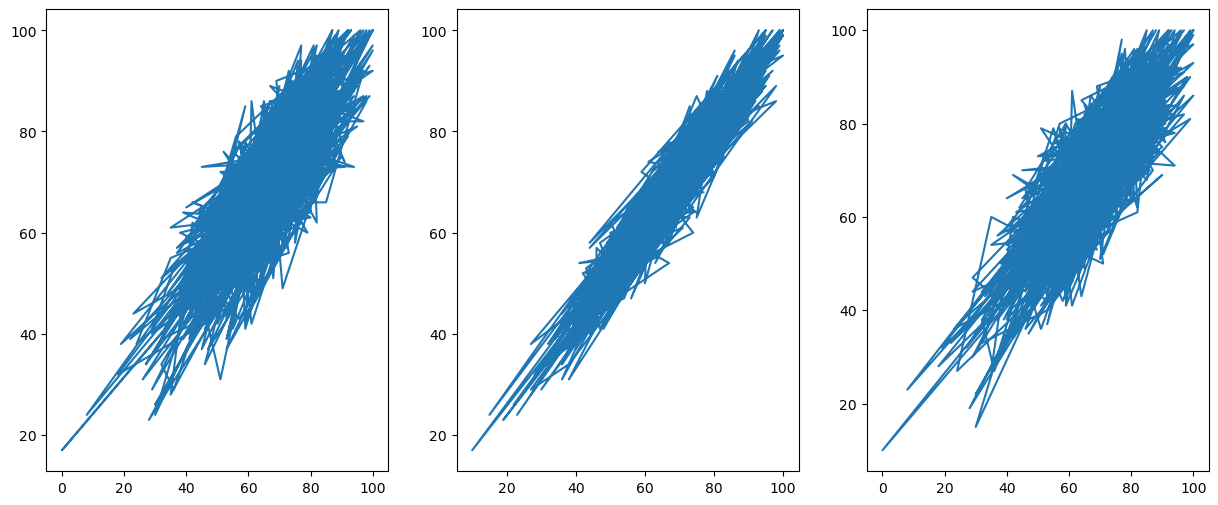

In [21]:
plt.rcParams["figure.figsize"] = (15,6)
plt.subplot(1, 3, 1)
plt.plot(num_df['math score'],num_df['reading score'])
plt.subplot(1, 3, 2)
plt.plot(num_df['writing score'],num_df['reading score'])
plt.subplot(1, 3, 3)
plt.plot(num_df['math score'],num_df['writing score'])
plt.show()

#### Insight 
- We can observe linear relationship amoung two varibales.
- lets prove it hypothetically too using spearman Rank and Pearson Correlation Tests.

In [22]:
from scipy.stats import spearmanr
from scipy.stats import pearsonr

In [23]:
def test_correlation(test_name,column1, column2):
    column1_to_test = num_df[column1]
    column2_to_test = num_df[column2]
    stat,p = test_name(column1_to_test , column2_to_test)
    d =dict()
    d['col1'] = column1
    d['col2'] = column2
    if p> 0.05:
        test_results.append("Independent Samples")
    else:
        test_results.append("Dependent Samples")
    columns_combination.append(d)

In [24]:
columns_combination = []
test_results = []
test_correlation(spearmanr,'math score','reading score')

In [25]:
test_correlation(spearmanr,'writing score','reading score')

In [26]:
test_correlation(spearmanr,'math score','writing score')

In [27]:
df_spearmanr = pd.DataFrame(columns_combination,test_results)
df_spearmanr

,col1,col2
Dependent Samples,math score,reading score
Dependent Samples,writing score,reading score
Dependent Samples,math score,writing score


####  2.5 pearsonr Test
- Ho : Independent Samples
- H1 : Dependent Samples

In [28]:
columns_combination = []
test_results = []
test_correlation(pearsonr,'math score','reading score')

In [29]:
test_correlation(pearsonr,'writing score','reading score')

In [30]:
test_correlation(pearsonr,'math score','writing score')

In [31]:
df_pearsonr = pd.DataFrame(columns_combination,test_results)
df_pearsonr

,col1,col2
Dependent Samples,math score,reading score
Dependent Samples,writing score,reading score
Dependent Samples,math score,writing score


#### Result
- At 5% level of significance
- From above two tests of Pearsonr and Spearmanr ,
- since all the three p-values are more than 0.05.
- Inference: The scores have a correlation between them.

In [32]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [33]:
categorical_features

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

#### 2.6 Chi-squared test 
* **Tests whether two categorical fetaures are dependent or Not.**
* Here we will test correlation of Categorical columns with Target column i.e average
* Assumptions-
 - All are Independent observation 
 - Size of each box of contingency table > 25

In [34]:
from scipy.stats import chi2_contingency

In [35]:
chi2_squared_test = []
for feature in categorical_features:
    stat, p , dof, expected = chi2_contingency(pd.crosstab(df['math score'], df[feature]))
    if p> 0.05:
        chi2_squared_test.append("Independent Categories")
    else:
        chi2_squared_test.append("Dependent Categories")

In [36]:
result = pd.DataFrame(data=[categorical_features, chi2_squared_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,gender,Independent Categories
1,race/ethnicity,Independent Categories
2,parental level of education,Independent Categories
3,lunch,Dependent Categories
4,test preparation course,Independent Categories


**Insights** 
* Here our output is dependent on Lunch

#### 2.7 Levene's Test 
* **Equality of variance test**

- Ho : Female and male have equal variance
- H1 : Female and male do not have equal variance

In [37]:
math_var = scipy.stats.levene(df[df['gender']=='female']['math score'],
                  df[df['gender']=='male']['math score'], center = 'mean')
reading_var = scipy.stats.levene(df[df['gender']=='female']['reading score'],
                  df[df['gender']=='male']['reading score'], center = 'mean')
writing_var = scipy.stats.levene(df[df['gender']=='female']['writing score'],
                  df[df['gender']=='male']['writing score'], center = 'mean')

In [38]:
print("Test Statistic and p-value for math  is", math_var)
print('\n')
print("Test Statistic and p-value for writing is", writing_var)
print('\n')
print("Test Statistic and p-value for reading is", reading_var)

Test Statistic and p-value for math  is LeveneResult(statistic=0.39659058260357727, pvalue=0.5289994390328784)


Test Statistic and p-value for writing is LeveneResult(statistic=0.029036281877215228, pvalue=0.8647298283415281)


Test Statistic and p-value for reading is LeveneResult(statistic=0.016652697287322132, pvalue=0.8973477814233404)


#### Result
- Conclusion : Since, at 5% level of significance, P(calculated) > P(0.05).
- Therefore we will accept the null hypothesis
- Inference : All the scores have equal variance with respect to gender.

#### 2.8 Checking Correlation using Heatmaps

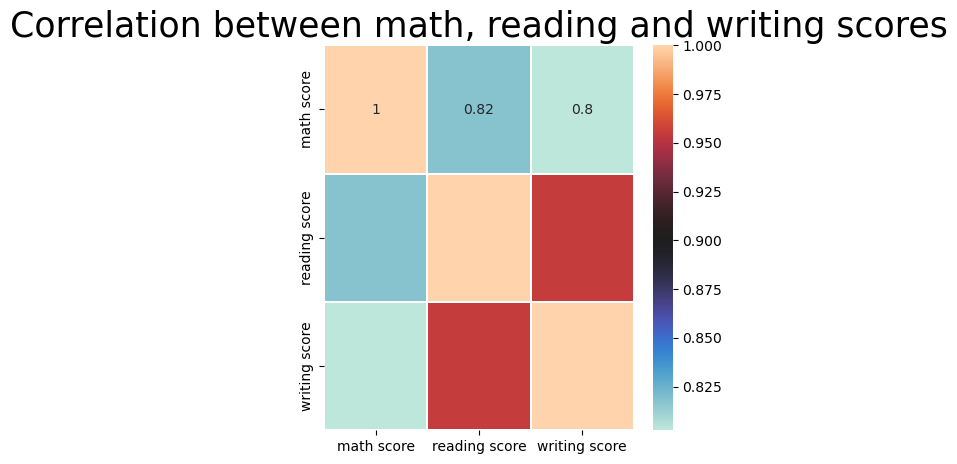

In [41]:
 # Relationship analysis
sns.heatmap(df_num.corr(),annot=True,cmap='icefire',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(5,5)
#fig.title('corelation between math, reading and writing scores')
plt.title('Correlation between math, reading and writing scores',color='black',size=25)
plt.show()

#### Insights 
- Total_score is highly correlated with individual score.
- Reading score is also highly correlated with writing score which means students who reads well can also writes well.
- Math_score doesnt have much high correlation so it is not neccessary that if a student performs well in maths has to perform well in other aspects or vice-versa
- Total_score and average are highy correlated , hence we can delete one amoung them.

###  3 . Checking for Normal Distribution using Transformations
- Q-Q plot (to check if data is normally distributed or not)

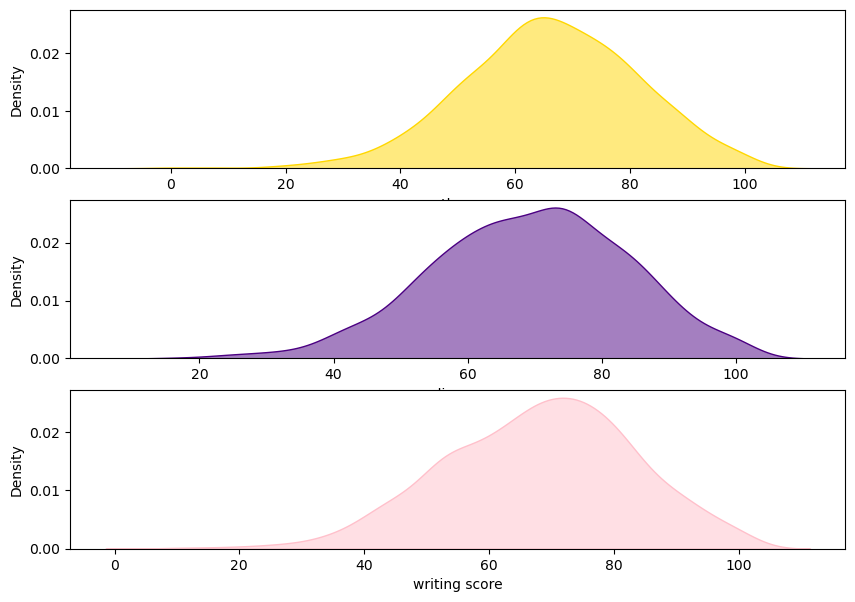

In [42]:
# density plot using seaborn library
fig, axs = plt.subplots(3, 1, figsize=(10, 7))

sns.kdeplot(df['math score'],shade=True,label='Maths',color='gold',ax=axs[0],alpha=0.5)
sns.kdeplot(df['reading score'],shade=True,label='Reading',color='indigo',ax=axs[1],alpha=0.5)
sns.kdeplot(df['writing score'],shade=True,label='Writing',color='pink',ax=axs[2],alpha=0.5)
plt.show()

In [46]:
def plots(df,var,t):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.distplot(df[var])
    plt.title('before' + str(t))
    plt.subplot(122)
    sns.distplot(t)
    plt.title('After' + str(t))
    plt.show()

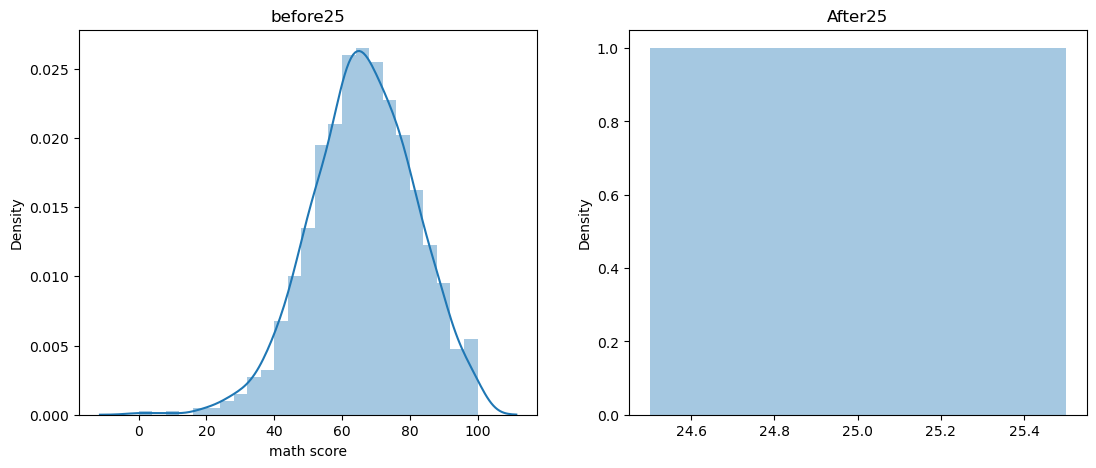

In [49]:
plots(df, 'math score', 25)

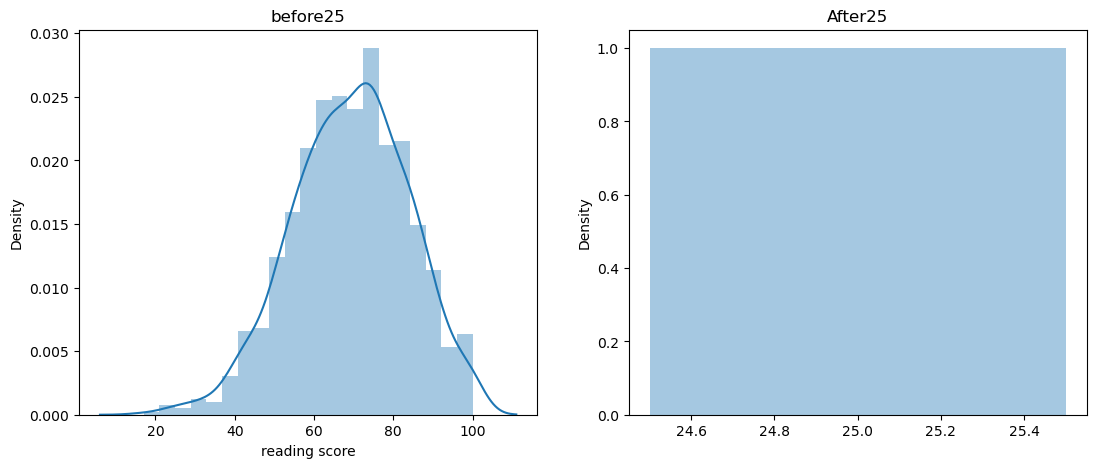

In [50]:
plots(df, 'reading score', 25)

#### 3.1 Log Transform

#### 3.1 Box-Cox Transform
- Assumption -
 * your data must be positive

In [51]:
def plot_qq_plot(column):
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(df[column])
    plt.title("{} PDF".format(column))
    plt.subplot(122)
    stats.probplot(df[column], dist="norm", plot=plt)
    plt.title('{} QQ Plot'.format(column))
    plt.show()

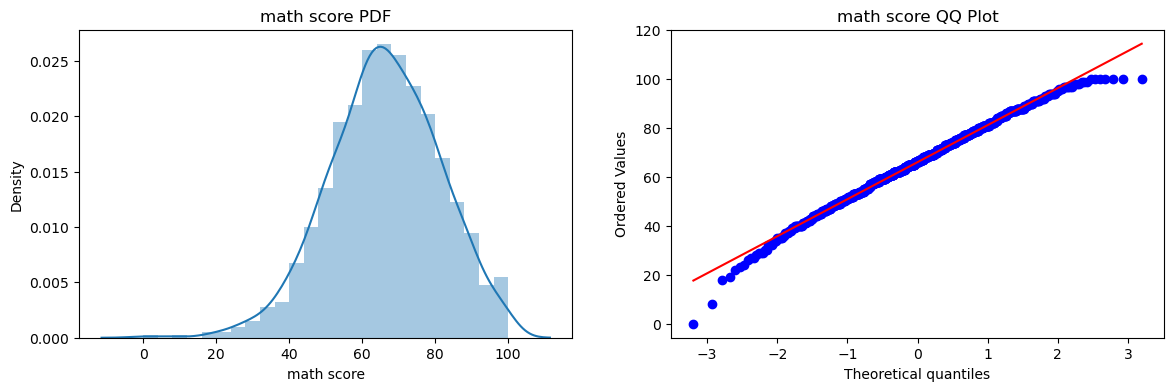

In [52]:
plot_qq_plot('math score')

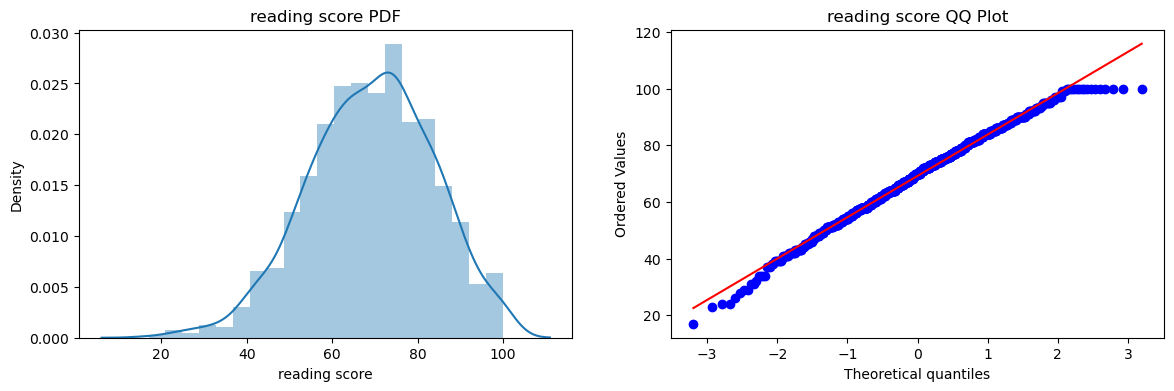

In [53]:
plot_qq_plot('reading score')

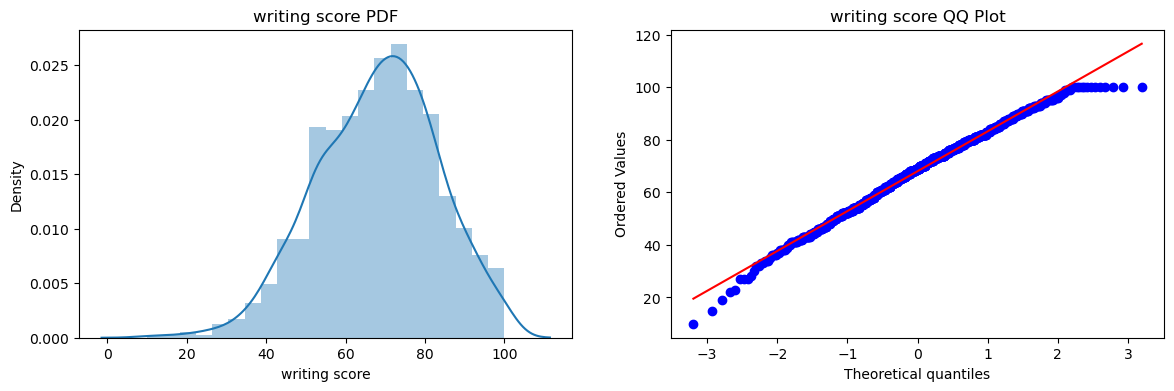

In [54]:
plot_qq_plot('writing score')

#### Insights
-  For range -2 to 2 math score follows normal distribution, but for values less than -2 and for values greater than 2 it doesn't follow normal distribution

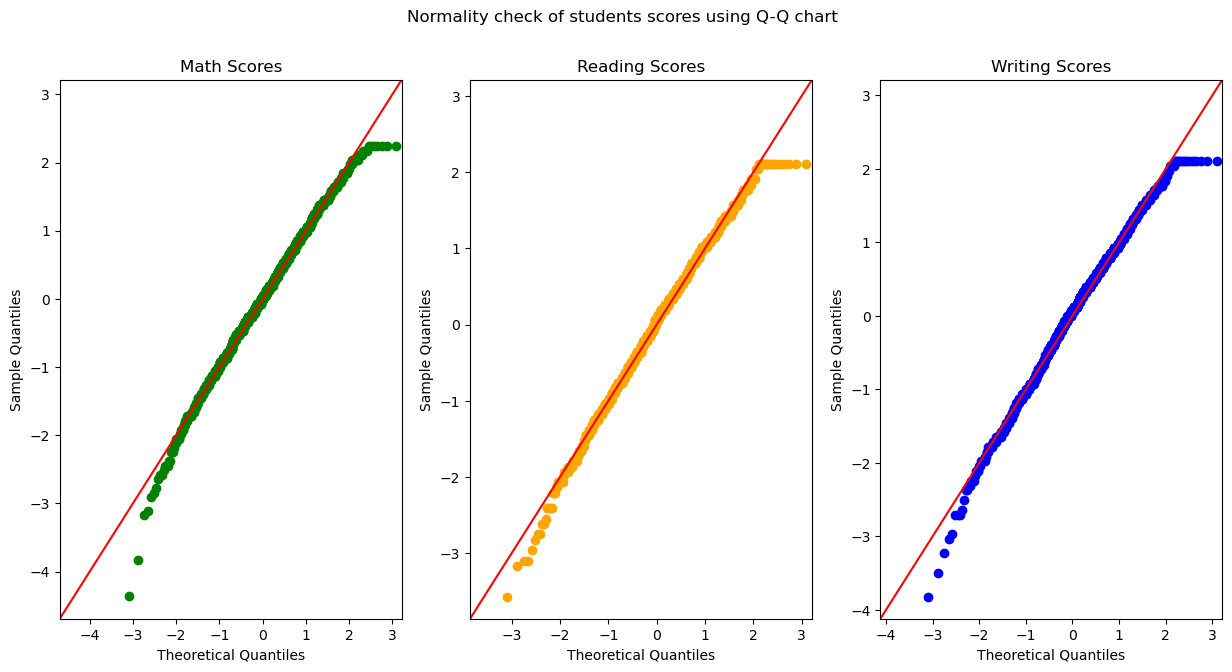

In [56]:
import statsmodels.api as sm # to build the Q-Q graph
# Create three subplots
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3,figsize=(15, 7)) 


sm.qqplot(df['math score'], markerfacecolor = "green", markeredgecolor = "green", line='45',  fit = True, ax=ax1)
ax1.set_title("Math Scores")

sm.qqplot(df['reading score'], markerfacecolor = "orange", markeredgecolor = "orange", line='45', fit = True, ax=ax2)
ax2.set_title("Reading Scores")

sm.qqplot(df['writing score'], markerfacecolor = "blue", markeredgecolor = "blue", line='45', fit = True, ax=ax3)
ax3.set_title("Writing Scores")

# Set the global title
plt.suptitle("Normality check of students scores using Q-Q chart")

plt.show()

#### #### Insights
  - There exists correlation between students scores and the normal distribution line. This means that our data is very close to Gaussian! 

### 1. Identifying outliers with visualization

In [57]:
num_features=[col for col in df.columns if df[col].dtype!='O']
num_df = df[num_features]
num_df.head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


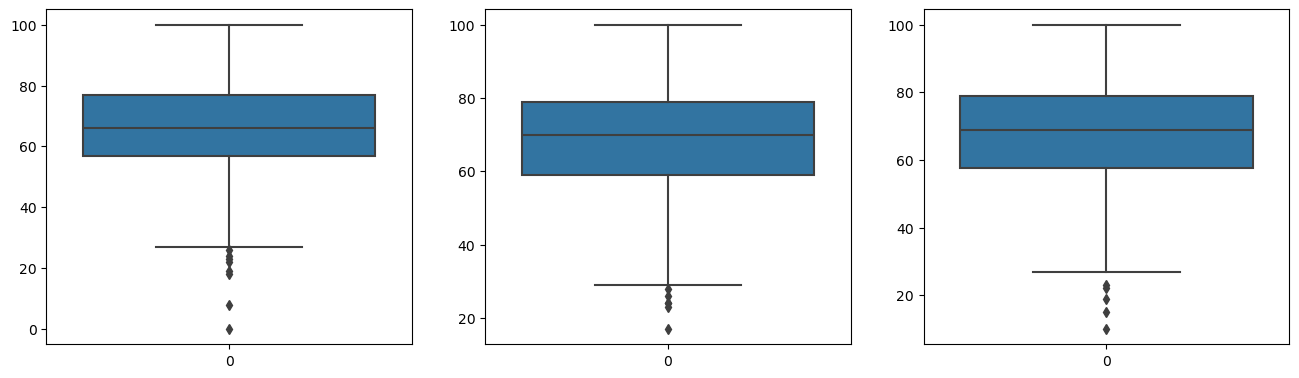

In [58]:
plt.figure(figsize=(50,20))
for i,col in enumerate(num_df.columns):
    plt.subplot(4,9,i+1)
    sns.boxplot(num_df[col])

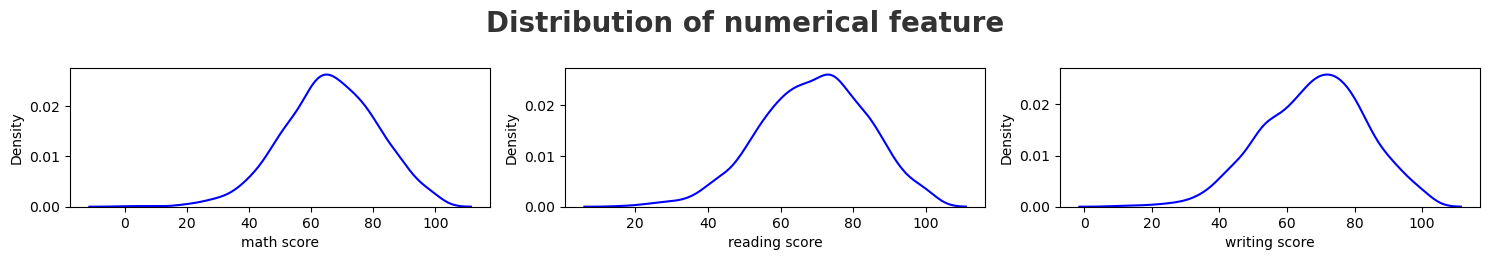

In [59]:
plt.figure(figsize=(15, 10))
plt.suptitle('Distribution of numerical feature', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

#### Insigths
- The outliers are there ,as there are many data points which lie far away from maximum points.

In [60]:
obj = ['race/ethnicity','parental level of education','lunch','test preparation course','gender']
def count_outliers(data,col):
        q1 = data[col].quantile(0.25,interpolation='nearest')
        q2 = data[col].quantile(0.5,interpolation='nearest')
        q3 = data[col].quantile(0.75,interpolation='nearest')
        q4 = data[col].quantile(1,interpolation='nearest')
        IQR = q3 -q1
        global LLP
        global ULP
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        if data[col].min() > LLP and data[col].max() < ULP:
            print("No outliers in",i)
        else:
            print("There are outliers in",i)
            x = data[data[col]<LLP][col].size
            y = data[data[col]>ULP][col].size
            a.append(i)
            print('Count of outliers are:',x+y)
global a
a = []
x = df.drop(obj,axis = 1)
for i in x.columns:
    count_outliers(x,i)

There are outliers in math score
Count of outliers are: 8
There are outliers in reading score
Count of outliers are: 6
There are outliers in writing score
Count of outliers are: 5


### 2 .  Z-score  method
#### Z-score:
- The number of standard deviations away from the mean that a particular observation is.
- A negative Z-score means an observation is below the mean.
- while a positive Z-score means means it above the mean.
- The further away from 0 the Z-Score is, the further away from the mean your observation is.

In [61]:
# Function to detect outliers
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.10)
    quartile3 = dataframe[variable].quantile(0.90)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [62]:
## function to remove outliers
def replace_with_thresholds(dataframe, numeric_columns):
    for variable in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, variable)
        dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
        dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [63]:
replace_with_thresholds(num_df, num_df.columns)

In [64]:
low_limit=27

In [65]:
num_df.loc[(num_df['math score']<25),'math score']=low_limit

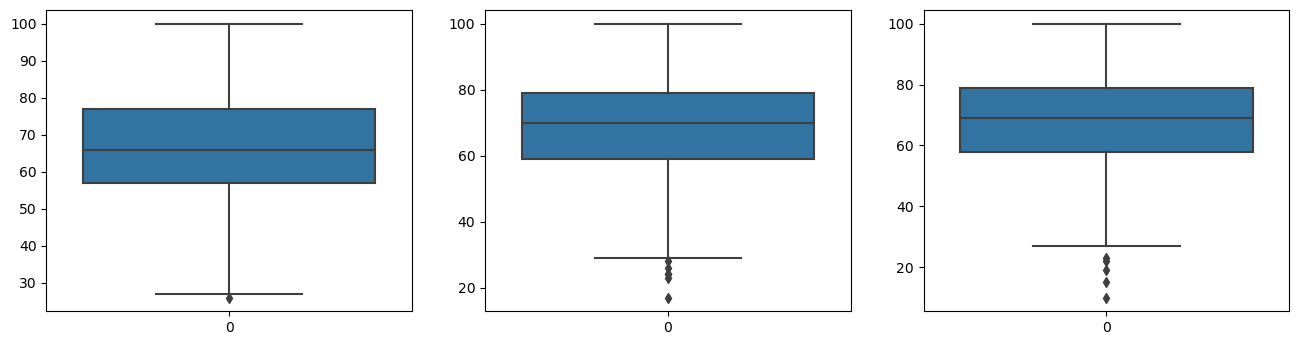

In [67]:
plt.figure(figsize=(50,18))
for i,col in enumerate(num_df.columns):
    plt.subplot(4,9,i+1)
    sns.boxplot(num_df[col])

#### Insights
- As we can see from above boxplots outliers are not removed properly

### 3.  Interquartile Range Method( IQR ) method

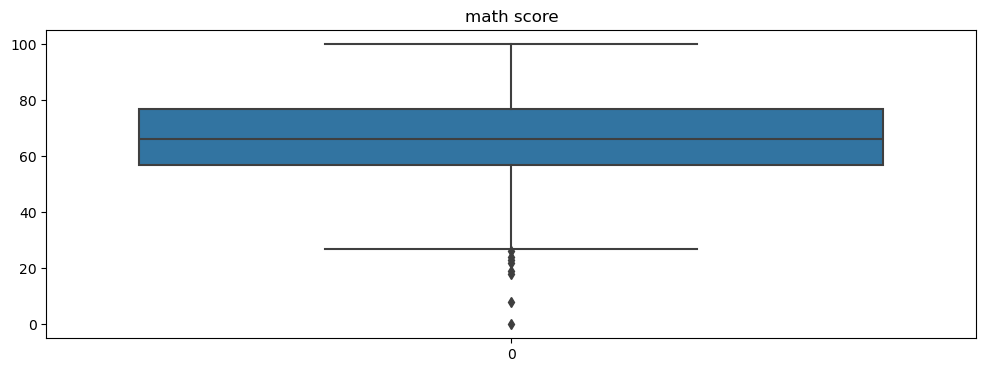

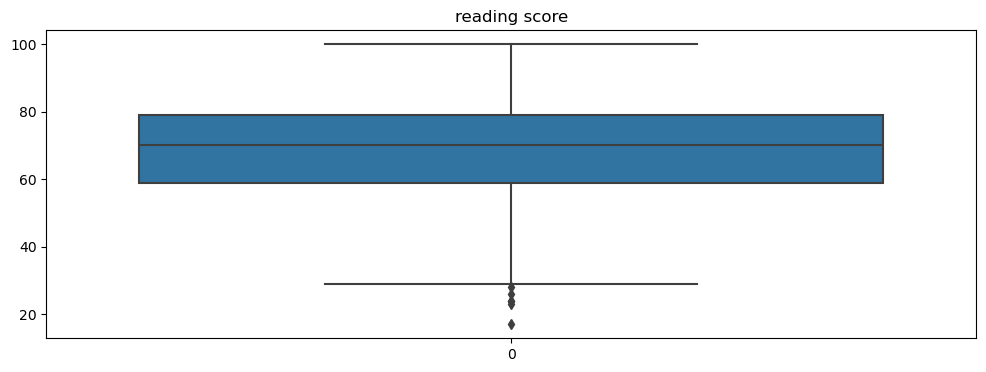

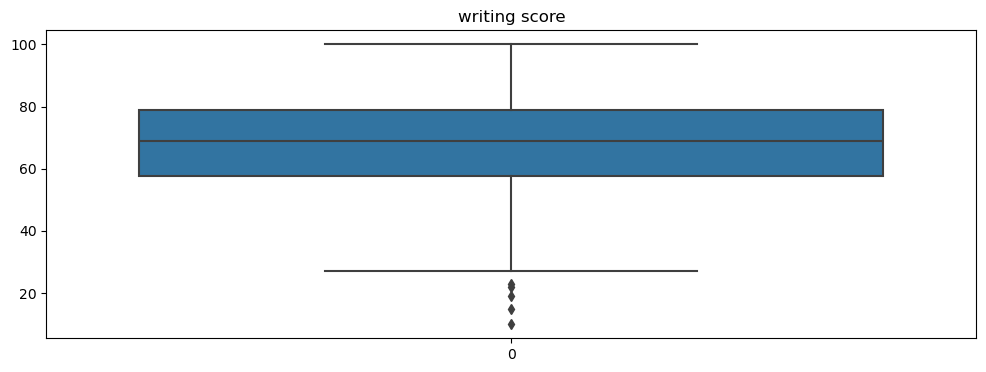

In [68]:
for col in num_df.columns:
    plt.figure(figsize=(12,4))
    sns.boxplot(df[col])
    plt.title(col)

In [69]:
df1 = df.copy()
def remove_outliers_IQR(col):
    # Finding the IQR
    percentile25 = df1[col].quantile(0.25)
    percentile75 = df1[col].quantile(0.75)
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    df1[col] = np.where(df1[col]>upper_limit, upper_limit, np.where(df1[col]<lower_limit,lower_limit,df1[col]))
    return df1[df1[col] > upper_limit]

In [70]:
remove_outliers_IQR('math score')

percentile25 57.0
percentile75 77.0
Upper limit 107.0
Lower limit 27.0


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


In [71]:
def create_comparison_plot(df,df1,column):
    # Comparing
    plt.figure(figsize=(16,8))
    plt.subplot(2,2,1)
    sns.distplot(df[column])

    plt.subplot(2,2,2)
    sns.boxplot(df[column])

    plt.subplot(2,2,3)
    sns.distplot(df1[column])

    plt.subplot(2,2,4)
    sns.boxplot(df1[column])

    plt.show()

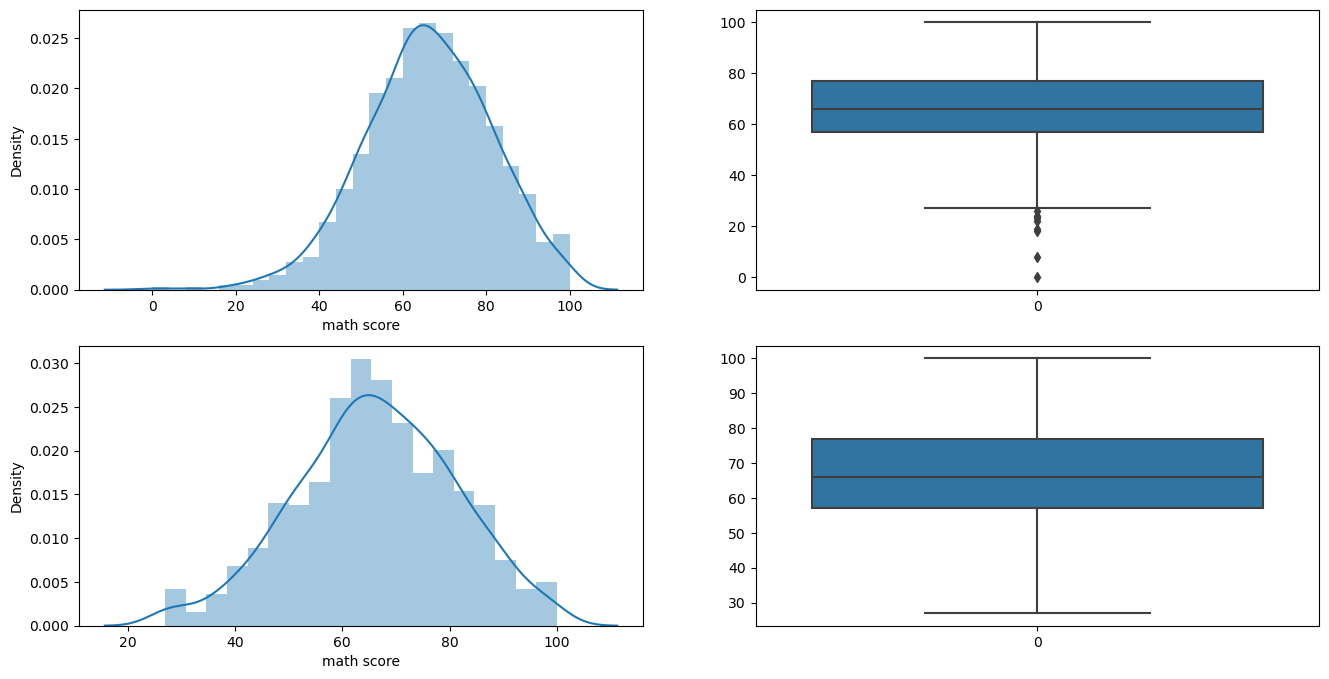

In [72]:
create_comparison_plot(df,df1,"math score")

In [73]:
remove_outliers_IQR('reading score')

percentile25 59.0
percentile75 79.0
Upper limit 109.0
Lower limit 29.0


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


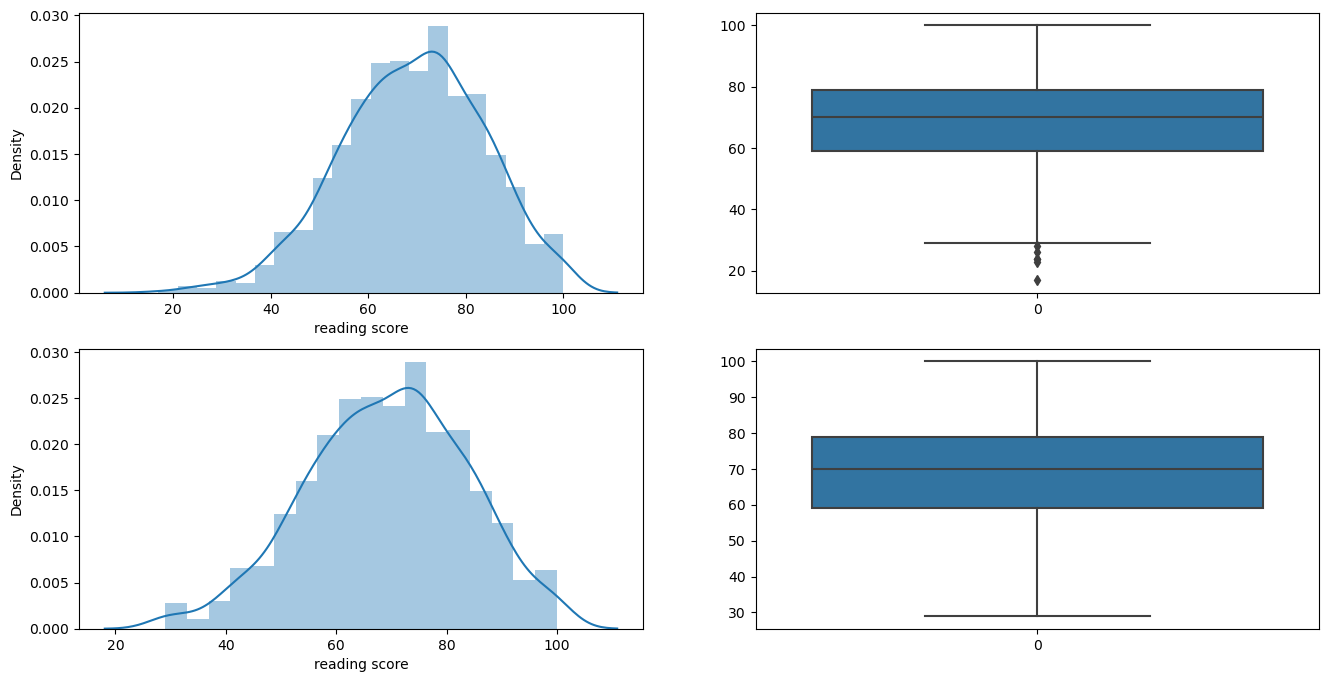

In [74]:
create_comparison_plot(df,df1,"reading score")

In [75]:
remove_outliers_IQR('writing score')

percentile25 57.75
percentile75 79.0
Upper limit 110.875
Lower limit 25.875


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


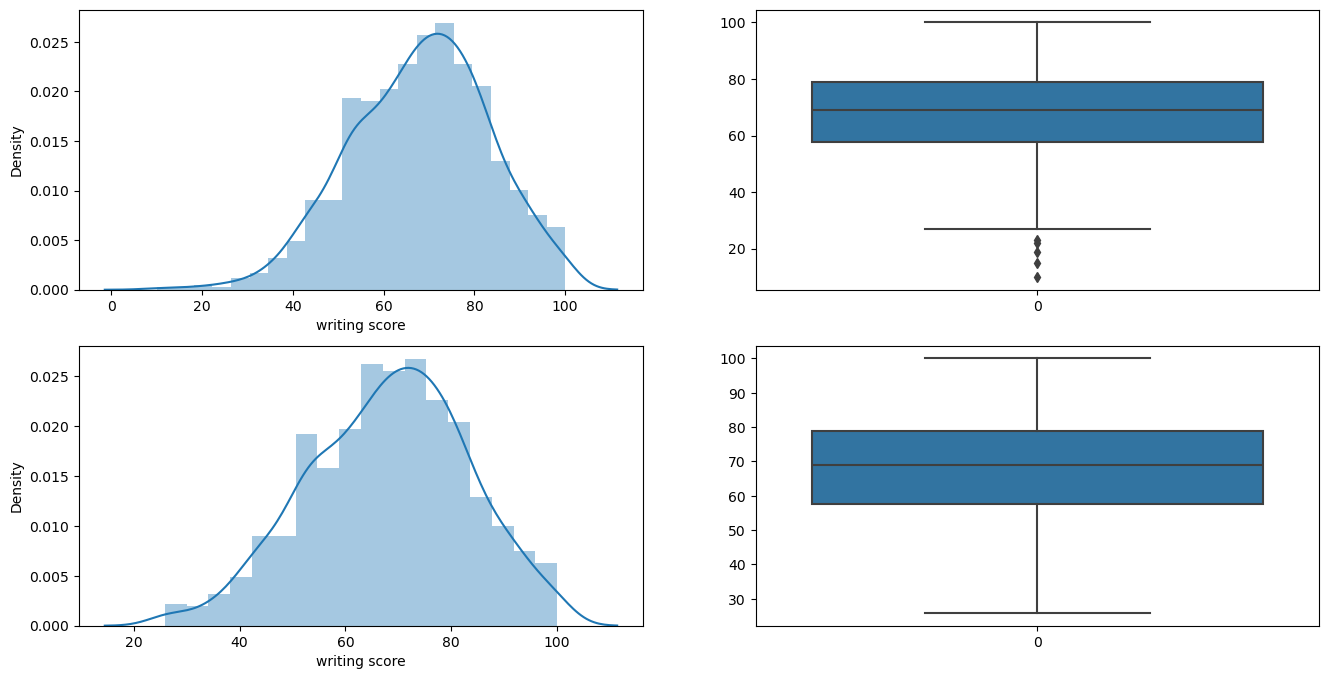

In [76]:
create_comparison_plot(df,df1,"writing score")

### 4. Compare Skewness

In [78]:
df_num.skew()

math score      -0.278935
reading score   -0.259105
writing score   -0.289444
dtype: float64

In [82]:
df2 = df1.iloc[:, 5:]

In [83]:
df2.skew()

math score      -0.148833
reading score   -0.209790
writing score   -0.223701
dtype: float64

#### Insights
- Skewness is reduced after we have removed ouliers using IQR Method

In [ ]:
df.to_csv('outlier_removed.csv', index=False)